## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [7]:
#1a
import pandas as pd
import json
from collections import defaultdict
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

nodes_df = pd.DataFrame(data['nodes'], columns=['User', 'Influence'])

edges_df = pd.DataFrame(data['edges'], columns=['User1', 'User2', 'Weight'])

network = defaultdict(dict)

for user, influence in data['nodes']:
    network[user] = {}

for user1, user2, weight in data['edges']:
    network[user1][user2] = weight
    network[user2][user1] = weight  

print(dict(network))

{'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}, 'pomelo-nwu': {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}, 'tyn1998': {'a

In [8]:
#1b
friends = {user: list(network[user].keys()) for user in network}
print(friends)

{'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'tyn1998': ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonneyx', 'ste

In [9]:
#2a
degrees = {user: len(friends[user]) for user in friends}
top_5_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_degrees)

[('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]


In [10]:
#2b
influence_scores = {user: influence for user, influence in data['nodes']}
top_5_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_influence)

[('Yanyan-Wang', 50.95), ('Aarebecca', 23.82), ('pomelo-nwu', 22.36), ('tyn1998', 16.64), ('frank-zsy', 15.8)]


In [12]:
#2c
combined_scores = {user: 0.5 * influence_scores[user] + 0.5 * degrees[user] for user in influence_scores}
top_combined = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_combined)

[('Yanyan-Wang', 32.475), ('tyn1998', 23.32), ('pomelo-nwu', 23.18), ('frank-zsy', 22.9), ('Aarebecca', 17.41)]


In [13]:
#3a
user = "Yanyan-Wang"
friends_of_friends = defaultdict(int)

for friend in friends[user]:
    for fof in friends[friend]:
        if fof != user and fof not in friends[user]:
            friends_of_friends[fof] += 1

recommended_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)
print(recommended_friends)
#推荐朋友为'will-ww','zhicheng-ning','PureNatural','xiaoya-yaya','xgdyp','longyanz'
# 'Zzzzzhuzhiwei','birdflyi','lhbvvvvv','zhaosj975'
# 原因是拥有最多的共同朋友，都是六个。

[('will-ww', 6), ('zhicheng-ning', 6), ('PureNatural', 6), ('xiaoya-yaya', 6), ('xgdyp', 6), ('longyanz', 6), ('Zzzzzhuzhiwei', 6), ('birdflyi', 6), ('lhbvvvvv', 6), ('zhaosj975', 6), ('stevending1st', 5), ('wxharry', 4), ('pranavshuklaa', 4), ('stealth-bombeer', 4), ('Vlad116', 4), ('kunal8411', 4)]


In [72]:
#3b
connection_strength = defaultdict(int)

for friend, weight in network[user].items():
    connection_strength[friend] += weight

for friend in friends[user]:
    for other in network[friend]:
        if other != user:
            connection_strength[other] += network[friend][other]

top_5_connections = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_connections)

[('tyn1998', 123.12000000000003), ('will-ww', 104.08000000000001), ('bifenglin', 92.89000000000003), ('frank-zsy', 89.64999999999999), ('andyhuang18', 84.18000000000002)]


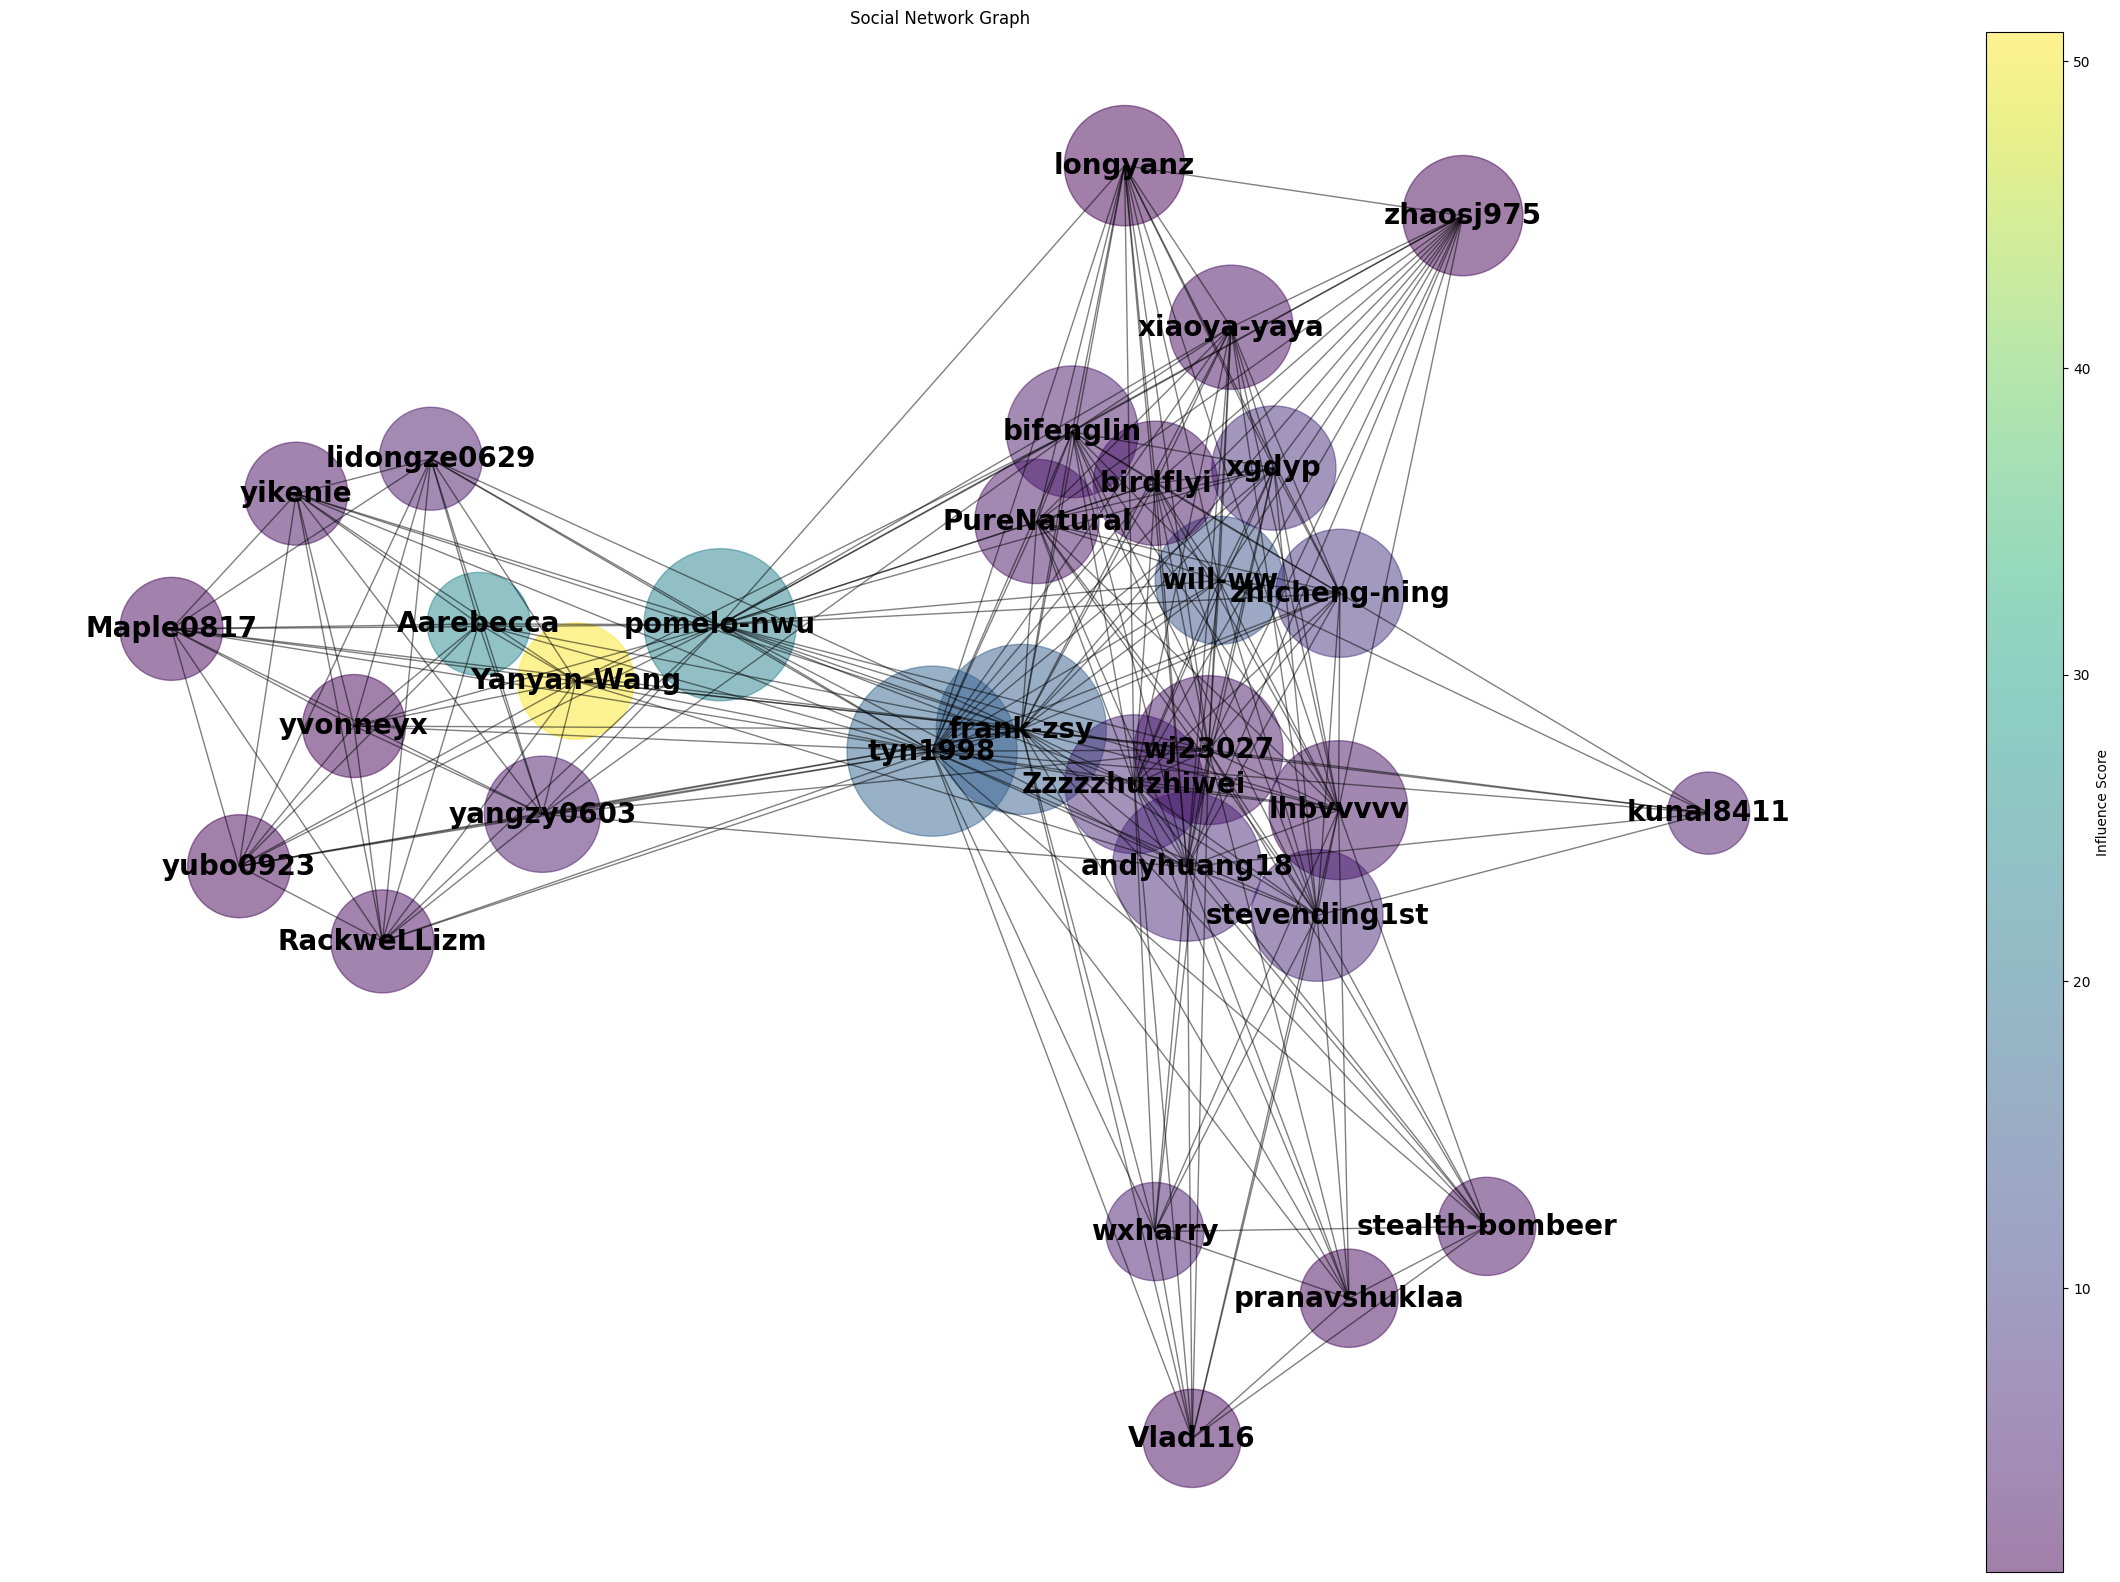

In [71]:
#4
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for _, row in nodes_df.iterrows():
    G.add_node(row['User'], influence=row['Influence'])

for _, row in edges_df.iterrows():
    G.add_edge(row['User1'], row['User2'], weight=row['Weight'])

plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G)

node_sizes = [500 * G.degree(node) for node in G.nodes()]
node_colors = [G.nodes[node]['influence'] for node in G.nodes()]

sc = plt.scatter(*zip(*pos.values()), s=node_sizes, c=node_colors, cmap='viridis', alpha=0.5)

cbar = plt.colorbar(sc)
cbar.set_label('Influence Score')

nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=20, font_color='black', font_weight='bold')

plt.savefig('social_network_graph.png', dpi=300)
plt.title('Social Network Graph')
plt.axis('off') 
plt.show()


### 如图所示，图中各节点表示用户，节点的大小代表用户直接朋友的数量，节点的颜色表示用户的影响力得分，颜色越浅表示影响力越大。节点之间的连线表示用户之间的朋友关系，线越粗表示朋友关系的强度越大。
### 可以看到，在社交网络中最具影响力的例如tyn1998、frank-zsy、pomelo-nwu，它们的影响力得分较高，直接朋友数量多、和朋友之间的联系多、强度大；例如andyhuang18，它的直接朋友数量多，联系多；例如Yanyan-Wang，其影响力得分最高。